In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
data.shape

(25, 2)

In [10]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [13]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

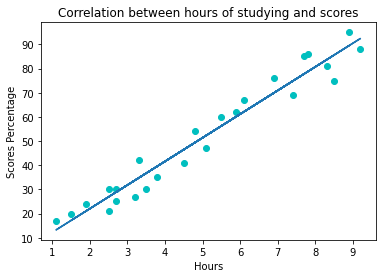

In [38]:
# data.plot(x='Hours', y='Scores', style='o')
X=np.array(data['Hours'])
y=np.array(data['Scores'])
plt.title('Correlation between hours of studying and scores')
plt.xlabel('Hours')
plt.ylabel('Scores Percentage')
m, b = np.polyfit(X, y, 1)
plt.plot(X, y, 'co')
plt.plot(X, m*X + b)
plt.show()

In [39]:
X

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

In [37]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
X_train

array([3.8, 1.9, 7.8, 6.9, 1.1, 5.1, 7.7, 3.3, 8.3, 9.2, 6.1, 3.5, 2.7,
       5.5, 2.7, 8.5, 2.5, 4.8, 8.9, 4.5])

In [41]:
X_test

array([1.5, 3.2, 7.4, 2.5, 5.9])

In [42]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [43]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [53]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
X_train = X_train.reshape(-1, 1)
y_train.reshape(-1, 1)
regressor.fit(X_train, y_train)
print('Training done!')

Training done!


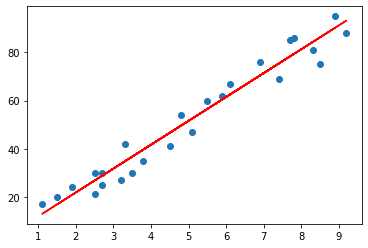

In [55]:
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X,y)
plt.plot(X, line, color='red')
plt.show()

In [59]:
X_test = X_test.reshape(-1, 1)
y_prediction = regressor.predict(X_test)
y_prediction

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [61]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_prediction})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [70]:
from sklearn import metrics
print('Mean Error is : ', metrics.mean_absolute_error(y_test, y_prediction))

Mean Error is :  4.183859899002975


In [73]:
hours = 9.25
my_prediction= regressor.predict([[hours]])
print(f"Number of hours studied: {hours}")
print(f"Expected Score: {my_prediction[0]}")

Number of hours studied: 9.25
Expected Score: 93.69173248737535
